## Preliminaries

In [1]:
library(ape)
library(ggtree)
library(phangorn)
library(Quartet)
library(adephylo)
library(dplyr)
library(ggplot2)
library(ggnewscale)

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

ggtree v3.2.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution. 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628




Attaching package: ‘ggtree’


The following object is masked from ‘package:ape’:

    rotate


Loading requir

#### Function to display RF and Quartet metrics

In [2]:
display_metrics <- function(tree, ref_tree) {
    splitStatuses <- SplitStatus(tree, ref_tree)
    quartetStatuses <- QuartetStatus(tree, ref_tree)
    # the least, the better (by distance)
    #print(paste("Robinson-Foulds: ", RawSymmetricDifference(splitStatuses, similarity = TRUE)))
    print(paste("RF (normalized)", RawSymmetricDifference(splitStatuses, similarity = TRUE) / splitStatuses[, 'N']))
    # the greater, the better (by similarity)
    print(paste("Quartet: ", SymmetricDifference(quartetStatuses, similarity = TRUE)))
}

## Comparison of trees

#### Loading trees

In [3]:
## adjust paths accordingly
ref_tree <- read.tree("../config/esche_shige_short.tree")
rankc_tree <- read.tree("../rankc_nj_tree_1_renamed.nwk")
dcj_tree <- read.tree("../dcj_nj_tree_1_unimog.nwk")

#### Rankc vs. Reference

In [4]:
display_metrics(rankc_tree, ref_tree)

[1] "RF (normalized) 0.470588235294118"
[1] "Quartet:  0.656965944272446"


#### Rank-Indel vs. Reference

In [5]:
## no need

#### DCJ-Indel vs. Reference

In [6]:
display_metrics(dcj_tree, ref_tree)

[1] "RF (normalized) 0.411764705882353"
[1] "Quartet:  0.657791537667699"


## Plotting

#### Reference

In [7]:
png("reference_tree.png")
plot <- ggtree(ref_tree, branch.length = "none") +
    geom_tiplab() + 
    geom_hilight(node=37, fill="green") +
    geom_cladelabel(node=37, label="B1", color="green", align=TRUE, offset=3.5) +
    geom_hilight(node=32, fill="blue") +
    geom_cladelabel(node=32, label="A", color="blue", align=TRUE, offset=3.5) +
    geom_hilight(node=25, fill="red") +
    geom_cladelabel(node=25, label="B2", color="red", align=TRUE, offset=3.5) +
    geom_hilight(node=24, fill="orange") +
    geom_cladelabel(node=24, label="D", color="orange", align=TRUE, offset=3) +
    geom_hilight(node=9, fill="orange") +
    geom_cladelabel(node=9, label="D", color="orange", align=TRUE, offset=3.5) +
    geom_hilight(node=35, fill="purple") +
    geom_cladelabel(node=35, label="S", color="purple", align=TRUE, offset=3) +
    geom_hilight(node=16, fill="purple") +
    geom_cladelabel(node=16, label="S", color="purple", align=TRUE, offset=3.5) +
    geom_hilight(node=10, fill="purple") +
    geom_cladelabel(node=10, label="S", color="purple", align=TRUE, offset=3.5) +
    xlim(0, 20)
print(plot)
dev.off()

png 
  2

#### Rankc

I removed the branch lenghts so that the plot works. Don't know why it breaks with branch lengths, even though I pass `branch.length="none"`.
```bash
cat rankc_nj_tree_1.nwk | sed 's/\:[0-9]*[\.[0-9]*]*//g' > rankc_nj_tree_1.nwk.nobranch
```

In [8]:
rankc_tree_nobranch <- read.tree("../rankc_nj_tree_1_renamed.nwk.nobranch")

png("rankc_tree.png")
plot <- ggtree(rankc_tree_nobranch) +
    geom_tiplab() +
    geom_hilight(node=26, fill="green") +
    geom_cladelabel(node=26, label="B1", color="green", align=TRUE, offset=3.5) +
    geom_hilight(node=29, fill="blue") +
    geom_cladelabel(node=29, label="A", color="blue", align=TRUE, offset=3.5) +
    geom_hilight(node=31, fill="orange") +
    geom_cladelabel(node=31, label="D", color="orange", align=TRUE, offset=3.5) +
    geom_hilight(node=33, fill="red") +
    geom_cladelabel(node=33, label="B2", color="red", align=TRUE, offset=3.5) +
    geom_hilight(node=37, fill="purple") +
    geom_cladelabel(node=37, label="S", color="purple", align=TRUE, offset=3.5) +
    xlim(0, 20)
print(plot)
dev.off()

png 
  2

#### DCJ-indel

I removed the branch lenghts so that the plot works. Don't know why it breaks with branch lengths, even though I pass `branch.length="none"`.
```bash
cat dcj_nj_tree_1.nwk | sed 's/\:[0-9]*[\.[0-9]*]*//g' > dcj_nj_tree_1.nwk.nobranch
```

In [9]:
dcj_tree_nobranch <- read.tree("../dcj_nj_tree_1_unimog.nwk.nobranch")

png("dcj_tree.png")
plot <- ggtree(dcj_tree_nobranch) +
    geom_tiplab() +
    geom_hilight(node=31, fill="green") +
    geom_cladelabel(node=31, label="B1", color="green", align=TRUE, offset=3.5) +
    geom_hilight(node=29, fill="blue") +
    geom_cladelabel(node=29, label="A", color="blue", align=TRUE, offset=3.5) +
    geom_hilight(node=34, fill="orange") +
    geom_cladelabel(node=34, label="D", color="orange", align=TRUE, offset=3) +
    geom_hilight(node=1, fill="orange") +
    geom_cladelabel(node=1, label="D", color="orange", align=TRUE, offset=3) +
    geom_hilight(node=35, fill="red") +
    geom_cladelabel(node=35, label="B2", color="red", align=TRUE, offset=3) +
    geom_hilight(node=39, fill="purple") +
    geom_cladelabel(node=39, label="S", color="purple", align=TRUE, offset=3) +
    geom_hilight(node=16, fill="purple") +
    geom_cladelabel(node=16, label="S", color="purple", align=TRUE, offset=3) +
    geom_hilight(node=19, fill="purple") +
    geom_cladelabel(node=19, label="S", color="purple", align=TRUE, offset=3) +
    xlim(0, 20)
print(plot)
dev.off()

png 
  2

#### Face-to-face

In [10]:
plot_cophylo <- function(tree1, tree2) {
    cophyloplot(ladderize(tree1), ladderize(tree2),
                assoc = matrix(rep(tree2$tip.label, 2), ncol = 2),
                length.line = 11, space = 60, gap = 3);
}

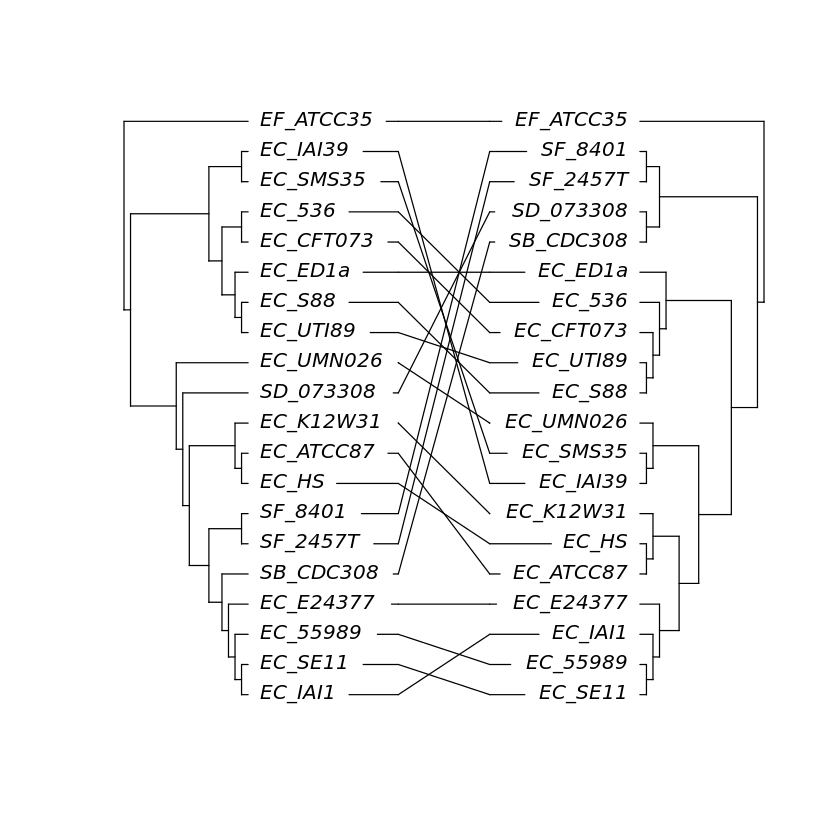

In [11]:
plot_cophylo(ref_tree, rankc_tree)

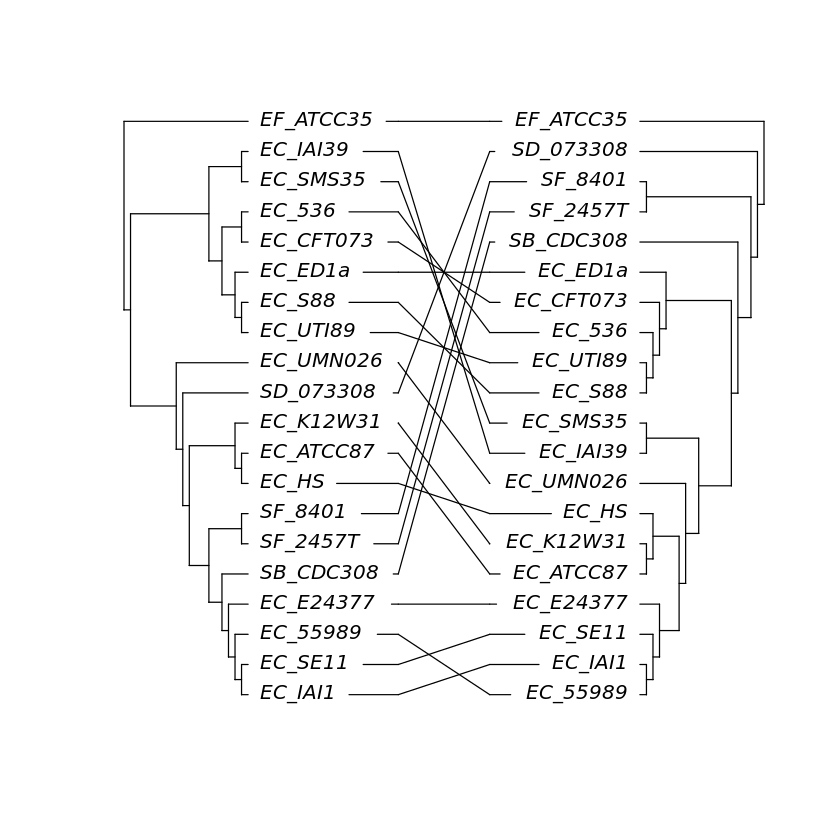

In [12]:
plot_cophylo(ref_tree, dcj_tree)